**Today concepts**
1. Linear Regression with multiple features
2. Polynomial features

**Linear Regression for prediction of house price in Boston dataset**

**1. Get the data**

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)
C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 124, got 112
  return f(*args, **kwds)


In [9]:
df = pd.DataFrame(boston['data'])
df.columns = boston['feature_names']
df['target'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Pre-processing**

In [10]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


**how many rows in our dataset**

In [12]:
df.shape

(506, 14)

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

**we can take randomly 1 column as feature and see the performations**

In [15]:
X = df[['RM']]
y = df['target']

**Its's better to split the data for 70% training and 30% testing**

In [16]:
from sklearn.model_selection import train_test_split

```
syntax
X_train,X_test,y_train,y_test = train_test_split(features,target,train_size=0.7)

```

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [22]:
X.shape

(506, 1)

In [23]:
X_train.shape

(354, 1)

In [24]:
X_test.shape

(152, 1)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

**Train the model with training data**

In [27]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Training score with training data**

In [29]:
model.score(X_train,y_train) * 100

51.98579659324531

**Testing score**

In [30]:
model.score(X_test,y_test) * 100

40.78192914526823

**scores are not well we have to improve with different technics**

In [31]:
import seaborn as sns

C:\Users\bandi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


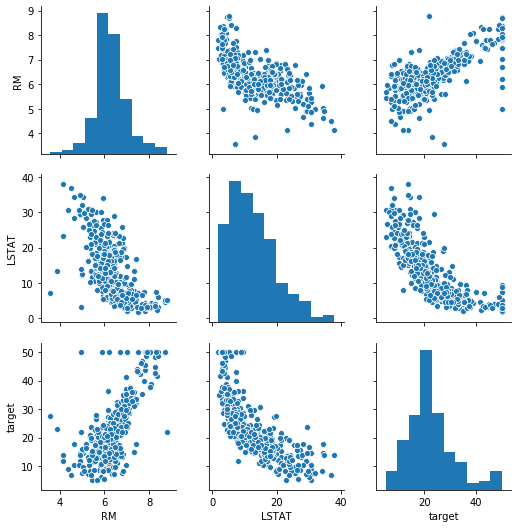

In [34]:
sns.pairplot(df[['RM','LSTAT','target']])

**It can draw column with other column is the scatter plot**

**column with same column  is the histogram**

**finding ralation between columns by using corr()**

if value near +1   we feature is positively co-related /positive linearity

if value near to -1 we can say it is negative lineariry

if value 0 there is  no relation

In [36]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


LSTAT ==> -0.73 ===> 73%
RM ===> 0.695360 ===> 69%
PTRATIO ==> 0.507787 ==> 50%


**we take LSTAT,RM as features and observe performance**

In [44]:
X = df[['LSTAT','RM','PTRATIO']]
y = df['target']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score**

In [47]:
model.score(X_train,y_train) * 100

68.01232740474384

**testing score**

In [48]:
model.score(X_test,y_test) * 100

67.26186849361012

**Train your model with different features and get the best score**

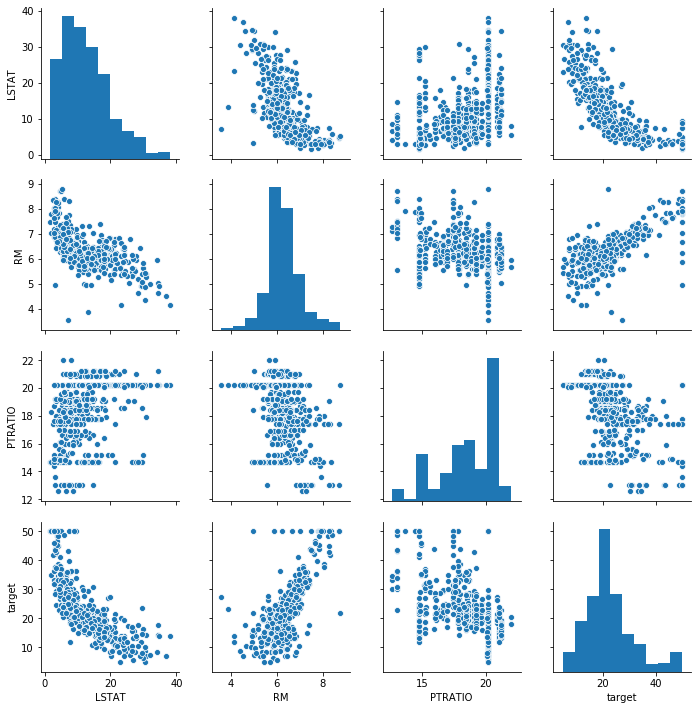

In [50]:
sns.pairplot(df[['LSTAT','RM','PTRATIO','target']])

#### Polynomial Features for Linear Regression

**We apply linear regression for salary prediction with and without polynomial features and compare the results**

**Get data**

In [52]:
experience = [0,1,2,3,4,5,6,7,8]

salary = [5000,6000,7000,8000,15000,25000,40000,55000,80000]

df = pd.DataFrame({'experience':experience,'salary':salary})
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,80000


**Pre-processing**

In [53]:
df.isna().sum()

experience    0
salary        0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
experience    9 non-null int64
salary        9 non-null int64
dtypes: int64(2)
memory usage: 184.0 bytes


**We apply simple linear regression without polynomial features**

In [55]:
df.shape

(9, 2)

In [56]:
# top 7 rows as training features and training target
X_train = df[['experience']].head(7)
y_train = df['salary'].head(7)

X_test = df[['experience']].tail(2)
y_test = df['salary'].tail(2)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score**

In [62]:
model.score(X_train,y_train) * 100

79.9249859786876

**testing score**

In [63]:
model.score(X_test,y_test) * 100

-466.47551020408207

In [64]:
import matplotlib.pyplot as plt

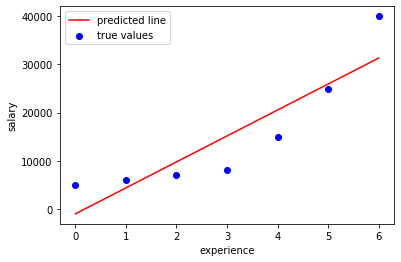

In [68]:
plt.figure()

plt.scatter(X_train,y_train,c='blue',label='true values')
plt.plot(X_train,model.predict(X_train),c='red',label='predicted line')
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()
plt.show()

**Applying polynomial features for the salary data**

In [69]:
# top 7 rows as training features and training target
X_train = df[['experience']].head(7)
y_train = df['salary'].head(7)

X_test = df[['experience']].tail(2)
y_test = df['salary'].tail(2)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

**steps for apply polynomial features**

In [72]:
# import the polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [74]:
# create the object with the higher order degree
poly = PolynomialFeatures(degree=2)

**it can create new features and tranform the data into higher order**

X_poly_train =  poly.fit_transform(trainingFeatures)

X_poly_test = poly.transform(testingFeatures)

In [77]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [78]:
X_train

,experience
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [79]:
pd.DataFrame(X_poly_train)

,0,1,2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
5,1.0,5.0,25.0
6,1.0,6.0,36.0


In [80]:
model.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training score**

In [82]:
model.score(X_poly_train,y_train) * 100

98.77079828005235

**testing score**

In [84]:
model.score(X_poly_test,y_test) * 100

87.91836734693888

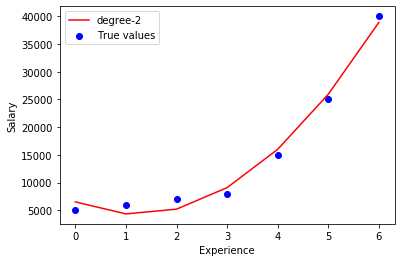

In [85]:
plt.figure()
plt.scatter(X_train,y_train,c='blue',label='True values')
plt.plot(X_train,model.predict(X_poly_train),c='red',label='degree-2')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()